1. Importing Libraries 

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns

2. Importing Dataset

In [30]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

3. Data Visualization

In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
# Check class distribution
df.describe()
print(df['Outcome'].value_counts())


Outcome
0    500
1    268
Name: count, dtype: int64


In [33]:
# Check for missing values
df.isna().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

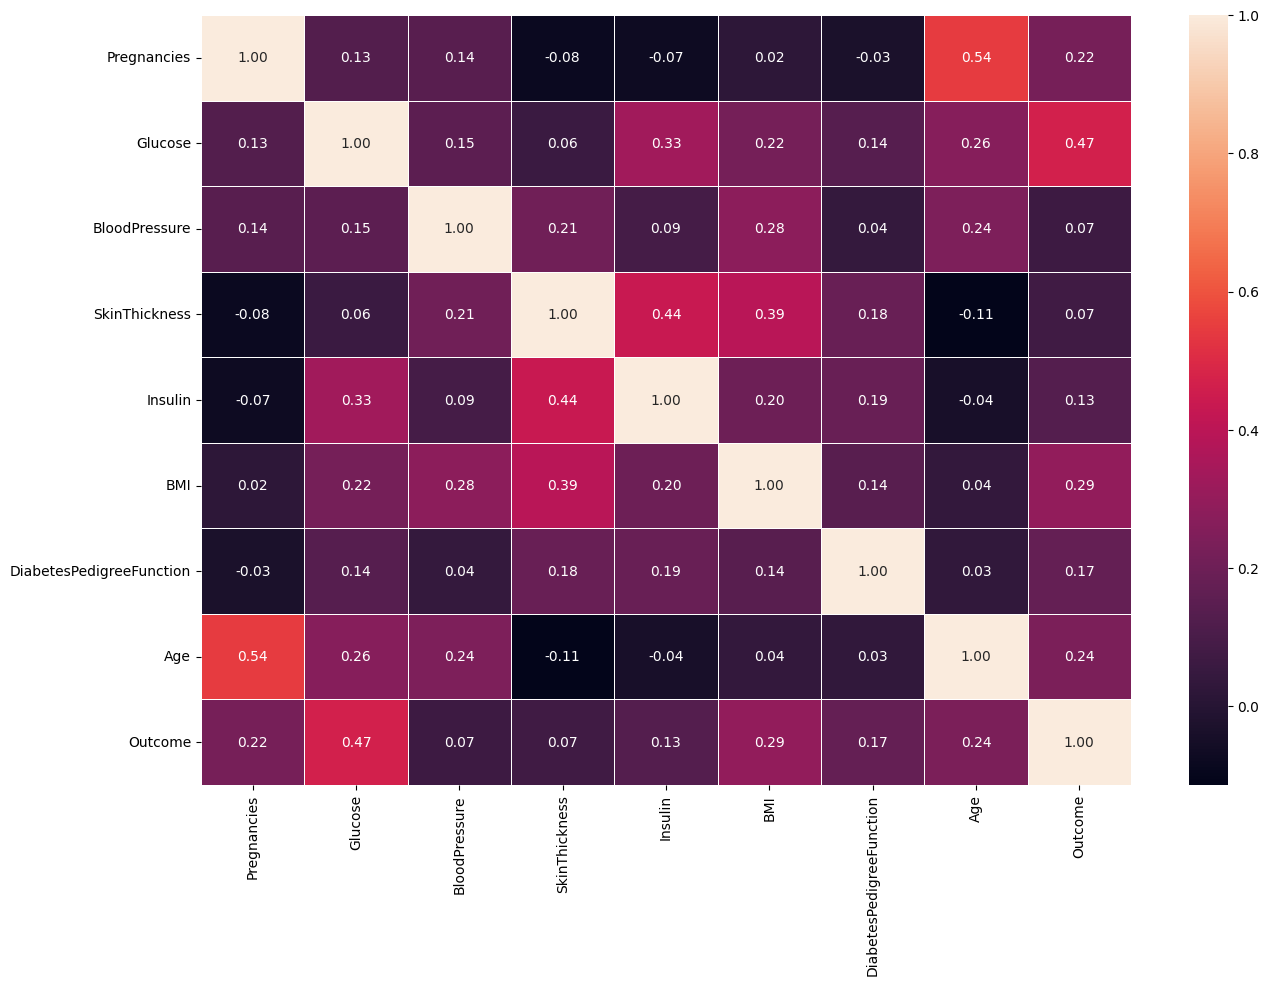

In [34]:
# correlation matrix
df.corr()

corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

4. Data Splitting

In [35]:
# Split into features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

5. Defining ML models

In [36]:
# Define the models with specified parameters
models = [
    ('Logistic Regression', LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)),
    ('Random Forest', RandomForestClassifier(n_estimators=10, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=1, criterion='gini', random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
    ('Support Vector Machine', SVC(kernel='linear')),
    ('AdaBoost', AdaBoostClassifier(n_estimators=50, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)),
    ('XGBoost', XGBClassifier(n_estimators=100, max_depth=3, random_state=42))
]

6. Training models

In [37]:
# Train and evaluate each model

# Initialize a list to store model performance metrics including accuracy
model_metrics = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    
    model_metrics.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

7. Evaluating model performance

In [38]:
# Create a DataFrame for all metrics
metrics_df = pd.DataFrame(model_metrics)

# Display the metrics DataFrame
print("Model Performance Metrics:")
print(metrics_df)

Model Performance Metrics:
                    Model  Accuracy  Precision    Recall  F1-Score
0     Logistic Regression  0.759740   0.680000  0.618182  0.647619
1           Random Forest  0.753247   0.649123  0.672727  0.660714
2           Decision Tree  0.759740   0.650000  0.709091  0.678261
3     K-Nearest Neighbors  0.662338   0.524590  0.581818  0.551724
4  Support Vector Machine  0.753247   0.654545  0.654545  0.654545
5                AdaBoost  0.733766   0.625000  0.636364  0.630631
6       Gradient Boosting  0.740260   0.627119  0.672727  0.649123
7                 XGBoost  0.707792   0.580645  0.654545  0.615385


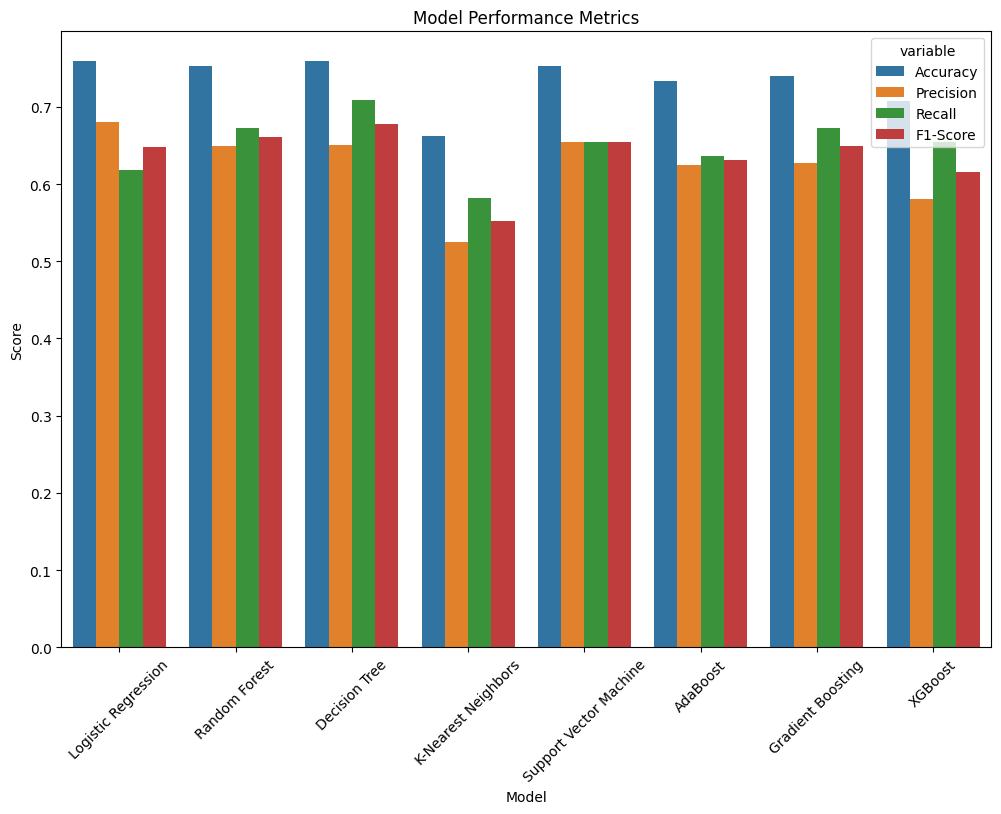

In [26]:
# Visualize the metrics
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='value', hue='variable', 
            data=pd.melt(metrics_df, id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score']))
plt.xticks(rotation=45)
plt.title('Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.show()

Decision Tree model has highest recall.

Extracting the Decision Tree model

In [40]:
from joblib import dump

# Define the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=1, criterion='gini', random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Save the model to a file
dump(dt_model, '../models/diabetes_prediction_decision_tree.sav')

['diabetes_prediction_decision_tree.sav']